In [104]:
import pandas as pd
import matplotlib as plt
import numpy as np
df = pd.read_csv(r'C:\Users\User\Downloads\credit  cards\Bank_Churn.csv')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [105]:
dataframe = df

In [106]:
#remove duplicates if they exist
dataframe=dataframe.drop_duplicates()

In [107]:
#loop through each row and drop columns where balance is zero and credit card has been cancelled 
for x in dataframe.index:
    if dataframe.loc[x,'Exited']==1 and dataframe.loc[x,'Balance']==0 and dataframe.loc[x,'IsActiveMember']==0:
        dataframe.drop(x,inplace=True)

In [108]:
dataframe

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [109]:
#change the values of the specified columns to Y & N 
dataframe['Exited'] = dataframe['Exited'].map({1:'Y',0:"N"})
dataframe['IsActiveMember'] = dataframe['IsActiveMember'].map({1:'Y',0:"N"})
dataframe['HasCrCard'] = dataframe['HasCrCard'].map({1:'Y',0:"N"})

In [110]:
# Rename specific columns using the rename() function
dataframe2 = dataframe.rename(columns={'Geography': 'Country'})

In [111]:
# Define the function to  change credit score values to a rating system
def map_value(x):
    if 0 <= x < 580:
        return "poor"
    elif 580 <= x < 670:
        return "fair"
    elif 670 <= x < 740:
        return "good"
    elif 740 <= x < 800:
        return "very good"
    else:
        return "excellent" 
dataframe2['CreditScore'] = dataframe2['CreditScore'].apply(map_value)

In [112]:
#change entries in customer ID column from integer to string datatype
dataframe2['CustomerId'] = dataframe2['CustomerId'].astype(str)

In [113]:
#replacing the first 3 chars of the entries in column 1 with the 
#first 3 chars of the entries in column 2
dataframe2['CustomerId'] = dataframe2.apply(lambda x: x['Surname'][:3] + x['CustomerId'][3:], axis=1)

In [114]:
dataframe2

,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Har34602,Hargrave,fair,France,Female,42,2,0.00,1,Y,Y,101348.88,Y
1,Hil47311,Hill,fair,Spain,Female,41,1,83807.86,1,N,Y,112542.58,N
2,Oni19304,Onio,poor,France,Female,42,8,159660.80,3,Y,N,113931.57,Y
3,Bon01354,Boni,good,France,Female,39,1,0.00,2,N,N,93826.63,N
4,Mit37888,Mitchell,excellent,Spain,Female,43,2,125510.82,1,Y,Y,79084.10,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obi06229,Obijiaku,very good,France,Male,39,5,0.00,2,Y,N,96270.64,N
9996,Joh69892,Johnstone,poor,France,Male,35,10,57369.61,1,Y,Y,101699.77,N
9997,Liu84532,Liu,good,France,Female,36,7,0.00,1,N,Y,42085.58,Y
9998,Sab82355,Sabbatini,very good,Germany,Male,42,3,75075.31,2,Y,N,92888.52,Y


In [115]:
dataframe2 = dataframe2.sort_values(by=['Gender', 'Country','Balance'], ascending=[True, True,False])

In [116]:
dataframe2

,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3280,To 15622,To Rot,fair,France,Female,57,3,238387.56,1,N,Y,147964.99,Y
1533,Moo69818,Moore,excellent,France,Female,37,3,212778.20,1,N,Y,69372.88,N
520,Mac71256,Macartney,excellent,France,Female,35,1,211774.31,1,Y,N,188574.12,Y
5871,Bur09920,Burke,poor,France,Female,33,2,208165.53,1,N,N,50774.81,Y
8982,Coa27971,Coates,poor,France,Female,32,8,206663.75,1,N,N,16281.94,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,Ho63874,Ho,fair,Spain,Male,46,8,0.00,2,Y,Y,60739.16,N
9955,Kas11338,Kashiwagi,good,Spain,Male,29,4,0.00,2,Y,Y,37605.90,N
9961,Ald66543,Aldridge,poor,Spain,Male,44,9,0.00,2,Y,N,107124.17,N
9989,McM05622,McMillan,excellent,Spain,Male,28,4,0.00,2,Y,Y,179436.60,N


In [119]:
dataframe2

,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,To 15622,To Rot,fair,France,Female,57,3,238387.56,1,N,Y,147964.99,Y
1,Moo69818,Moore,excellent,France,Female,37,3,212778.20,1,N,Y,69372.88,N
2,Mac71256,Macartney,excellent,France,Female,35,1,211774.31,1,Y,N,188574.12,Y
3,Bur09920,Burke,poor,France,Female,33,2,208165.53,1,N,N,50774.81,Y
4,Coa27971,Coates,poor,France,Female,32,8,206663.75,1,N,N,16281.94,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9675,Ho63874,Ho,fair,Spain,Male,46,8,0.00,2,Y,Y,60739.16,N
9676,Kas11338,Kashiwagi,good,Spain,Male,29,4,0.00,2,Y,Y,37605.90,N
9677,Ald66543,Aldridge,poor,Spain,Male,44,9,0.00,2,Y,N,107124.17,N
9678,McM05622,McMillan,excellent,Spain,Male,28,4,0.00,2,Y,Y,179436.60,N


In [120]:
dataframe2.reset_index(drop=True, inplace=True)

In [121]:
dataframe2

,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,To 15622,To Rot,fair,France,Female,57,3,238387.56,1,N,Y,147964.99,Y
1,Moo69818,Moore,excellent,France,Female,37,3,212778.20,1,N,Y,69372.88,N
2,Mac71256,Macartney,excellent,France,Female,35,1,211774.31,1,Y,N,188574.12,Y
3,Bur09920,Burke,poor,France,Female,33,2,208165.53,1,N,N,50774.81,Y
4,Coa27971,Coates,poor,France,Female,32,8,206663.75,1,N,N,16281.94,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9675,Ho63874,Ho,fair,Spain,Male,46,8,0.00,2,Y,Y,60739.16,N
9676,Kas11338,Kashiwagi,good,Spain,Male,29,4,0.00,2,Y,Y,37605.90,N
9677,Ald66543,Aldridge,poor,Spain,Male,44,9,0.00,2,Y,N,107124.17,N
9678,McM05622,McMillan,excellent,Spain,Male,28,4,0.00,2,Y,Y,179436.60,N


In [122]:
import seaborn as sns

In [128]:
df2=df
df2=df2.drop_duplicates()

In [129]:
for x in df2.index:
    if df2.loc[x,'Exited']==1 and df2.loc[x,'Balance']==0 and df2.loc[x,'IsActiveMember']==0:
        df2.drop(x,inplace=True)

In [132]:
df2

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [133]:
summary=df2.describe(include = 'all')

In [134]:
summary

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.680000e+03,9680,9680.000000,9680,9680,9680.000000,9680.000000,9680.000000,9680.000000,9680.000000,9680.000000,9680.000000,9680.000000
unique,NaN,2879,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,31,NaN,4805,5326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569092e+07,NaN,650.646074,NaN,NaN,38.720351,5.017252,79014.348438,1.532748,0.704545,0.532128,100037.104046,0.177376
std,7.193965e+04,NaN,96.541692,NaN,NaN,10.464864,2.893575,61825.180261,0.574416,0.456270,0.498992,57493.593264,0.382006
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562866e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51078.675000,0.000000
50%,1.569067e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,99467.780000,1.000000,1.000000,1.000000,100134.325000,0.000000
75%,1.575357e+07,NaN,718.000000,NaN,NaN,43.000000,8.000000,128476.127500,2.000000,1.000000,1.000000,149216.320000,0.000000


In [137]:
dataframe2.describe(include = 'all')

,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9680,9680,9680,9680,9680,9680.000000,9680.000000,9680.000000,9680.000000,9680,9680,9680.000000,9680
unique,9678,2879,5,3,2,NaN,NaN,NaN,NaN,2,2,NaN,2
top,Chu11635,Smith,fair,France,Male,NaN,NaN,NaN,NaN,Y,Y,NaN,N
freq,2,31,3227,4805,5326,NaN,NaN,NaN,NaN,6820,5151,NaN,7963
mean,NaN,NaN,NaN,NaN,NaN,38.720351,5.017252,79014.348438,1.532748,NaN,NaN,100037.104046,NaN
std,NaN,NaN,NaN,NaN,NaN,10.464864,2.893575,61825.180261,0.574416,NaN,NaN,57493.593264,NaN
min,NaN,NaN,NaN,NaN,NaN,18.000000,0.000000,0.000000,1.000000,NaN,NaN,11.580000,NaN
25%,NaN,NaN,NaN,NaN,NaN,32.000000,3.000000,0.000000,1.000000,NaN,NaN,51078.675000,NaN
50%,NaN,NaN,NaN,NaN,NaN,37.000000,5.000000,99467.780000,1.000000,NaN,NaN,100134.325000,NaN
75%,NaN,NaN,NaN,NaN,NaN,43.000000,8.000000,128476.127500,2.000000,NaN,NaN,149216.320000,NaN


In [135]:
import matplotlib.pyplot as plt

In [138]:
df2 = df2.rename(columns={'Geography': 'Country'})

In [139]:
df2.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Country', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

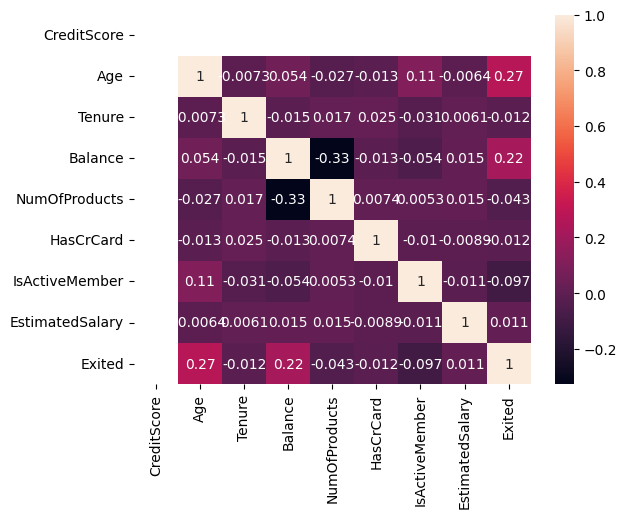

In [144]:
#maooing out correlations between columns
sns.heatmap(df2[['CreditScore', 'Age','Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
'Exited']].corr(),annot=True)
plt.rcParams['figure.figsize']=(20,7)
plt.show() 